<a href="https://colab.research.google.com/github/HermesLei/Python/blob/main/Analise_Mobiliaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import drive
drive.mount('/content/drive')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Carregar os dados em um DataFrame
houses_sale = pd.read_csv("/content/drive/MyDrive/DATASET_SALTO/real_estate_salto_sp_casa_venda_35.csv")
apartments_sale = pd.read_csv("/content/drive/MyDrive/DATASET_SALTO/real_estate_salto_sp_apartamento_venda_35.csv")
houses_rent = pd.read_csv("/content/drive/MyDrive/DATASET_SALTO/real_estate_salto_sp_casa_aluguel_3.csv")
apartments_rent = pd.read_csv("/content/drive/MyDrive/DATASET_SALTO/real_estate_salto_sp_apartamento_aluguel_5.csv")

# Verificar as primeiras linhas do DataFrame
houses_sale.head()

,nome_casa,endereço_casa,preco_casa,metros_casa,quartos_casa,banheiros_casa,vagas_casa
0,"Casa com 4 Quartos à Venda, 360m²","Rua Fortaleza, 342 - Jardim Panorama, Salto - SP",R$ 760.000,360,4,5,2
1,"Casa com 3 Quartos à Venda, 219m²","Rua das Palmas - Residencial Porto Seguro, Sal...",R$ 475.000,219,3,2,2
2,"Casa com 3 Quartos à Venda, 180m²","Rua Escócia - Jardim Elizabeth, Salto - SP",R$ 700.000,180,3,2,2
3,"Casa com 4 Quartos à Venda, 300m²","Rua dos Curumbatás - Urb Salto de São José, Sa...",R$ 1.562.000,300,4,3,4
4,"Casa com 3 Quartos à Venda, 308m²","Rua dos Pássaros, 0 - Residencial Lagos D Icar...",R$ 913.000,308,3,4,2


In [3]:
# Verificar informações sobre o DataFrame
houses_sale.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   nome_casa       1085 non-null   object
 1   endereço_casa   1085 non-null   object
 2   preco_casa      1085 non-null   object
 3   metros_casa     1085 non-null   int64 
 4   quartos_casa    1085 non-null   int64 
 5   banheiros_casa  1085 non-null   int64 
 6   vagas_casa      1085 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 59.5+ KB


In [4]:
# Verificar as estatísticas descritivas do DataFrame
houses_sale.describe()

,metros_casa,quartos_casa,banheiros_casa,vagas_casa
count,1085.000000,1085.000000,1085.000000,1085.000000
mean,185.213825,2.891244,2.669124,2.886636
std,98.584261,0.773862,1.291548,2.691221
min,35.000000,1.000000,1.000000,1.000000
25%,110.000000,2.000000,2.000000,2.000000
50%,164.000000,3.000000,2.000000,2.000000
75%,290.000000,3.000000,3.000000,3.000000
max,395.000000,5.000000,6.000000,18.000000


In [5]:
# Verificar a correlação entre as variáveis do DataFrame
houses_sale.corr()

,metros_casa,quartos_casa,banheiros_casa,vagas_casa
metros_casa,1.000000,0.754002,0.850814,0.105127
quartos_casa,0.754002,1.000000,0.713431,-0.019214
banheiros_casa,0.850814,0.713431,1.000000,0.028744
vagas_casa,0.105127,-0.019214,0.028744,1.000000


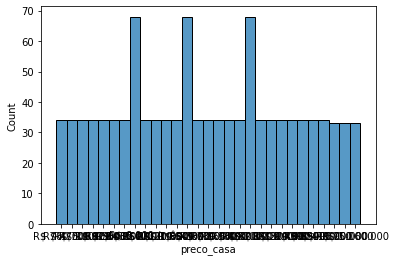

In [6]:
# Plotar um histograma dos preços das casas à venda
sns.histplot(houses_sale['preco_casa'], kde=False, bins=20)

([<matplotlib.axis.YTick at 0x7f6413cd9070>,
 <a list of 20 Text major ticklabel objects>)

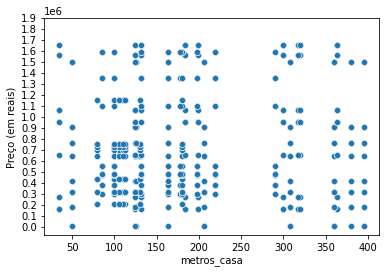

In [15]:
# Ordenar o dataframe pelo preço da casa em ordem crescente
houses_sale = houses_sale.sort_values(by='preco_casa')
# Plotar um gráfico de dispersão do preço versus tamanho das casas à venda
sns.scatterplot(x='metros_casa', y='preco_casa', data=houses_sale)
plt.ylabel('Preço (em reais)')
plt.yticks(range(0, 2000000, 100000))

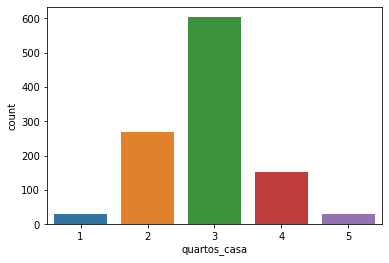

In [8]:
# Plotar um gráfico de barras com a contagem de casas à venda por número de quartos
sns.countplot(x='quartos_casa', data=houses_sale)

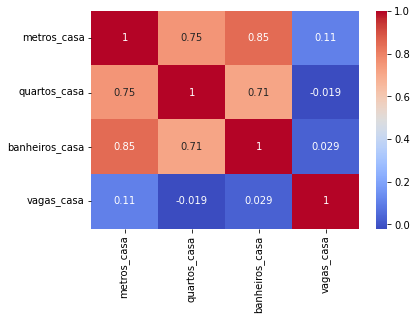

In [9]:
#Verificar a correlação entre as variáveis:
corr = houses_sale.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [10]:
#Ajustar um modelo de regressão linear para prever o preço com base nas outras variáveis:
houses_sale['preco_casa'] = houses_sale['preco_casa'].apply(lambda x: float(x.replace('R$ ', '').replace('.', '').replace(',', '.').replace(' /mês','')))
X = houses_sale[['metros_casa', 'quartos_casa', 'banheiros_casa', 'vagas_casa']]
y = houses_sale['preco_casa']
reg = LinearRegression().fit(X, y)
print("Coeficientes: ", reg.coef_)
print("Intercept: ", reg.intercept_)
y_pred = reg.predict(X)
print("MSE: ", mean_squared_error(y, y_pred))
print("R2: ", r2_score(y, y_pred))

Coeficientes:  [   307.68012835   4058.04907846 -14738.18973308   9020.3835933 ]
Intercept:  667228.890820683
MSE:  200162055040.3465
R2:  0.005375374871642302


In [11]:
#Fazer a previsão de preços com base nas outras variáveis:
X_new = [[70, 2, 1, 1]] # valores arbitrários para ilustrar a previsão
y_new = reg.predict(X_new)
print("Previsão: ", y_new)

Previsão:  [691164.79182246]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


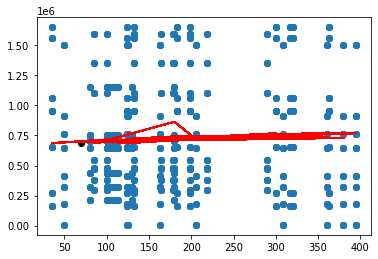

In [12]:
#Plotar a linha de tendência e a previsão no mesmo gráfico:
plt.scatter(houses_sale['metros_casa'], houses_sale['preco_casa'])
plt.plot(houses_sale['metros_casa'], y_pred, color='red')
plt.scatter(X_new[0][0], y_new, color='black')
plt.show()